In [9]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob

In [102]:
all_q = {}
x_dirs = glob('yz/*/')
x_dirs[0].split('/')


'1qtable'.split('1')

['', 'qtable']

In [103]:
for x_dir in x_dirs:
    chain_length = x_dir.split('/')[1]
    qtables = glob(f'{x_dir}{chain_length}*')
    print(qtables)
    all_q[chain_length] = {}
    for qtable in qtables:
        spacing = qtable.split(f'{x_dir}{chain_length}')[1].split('qtable')[0]
        
        
        with open(qtable) as fp:
            #The first 14 lines of the qTable do not contain spectrum data
            print(qtable)
            for blank in range(0,14):
                fp.readline()
            wave = []
            Q_ext = []
            Q_abs = []
            Q_sca = []
            for k in range(350,801):
                line = fp.readline()
                ary = line.split(" ")
                ary = [a for a in ary if a]
#                 print(ary[1:5])
                ary = np.array(ary[1:5]).astype(np.float)
                wave.append(float(ary[0]))
                Q_ext.append(float(ary[1]))
                Q_abs.append(float(ary[2]))
                Q_sca.append(float(ary[3]))

                
            df = pd.DataFrame({'wave': wave, 'Q_ext': Q_ext, 'Q_abs': Q_abs, 'Q_sca': Q_sca})
            all_q[chain_length][spacing] = df

['yz/32/321qtable', 'yz/32/323qtable', 'yz/32/322qtable', 'yz/32/324qtable']
yz/32/321qtable
yz/32/323qtable
yz/32/322qtable
yz/32/324qtable
['yz/35/352qtable', 'yz/35/354qtable', 'yz/35/351qtable', 'yz/35/353qtable']
yz/35/352qtable
yz/35/354qtable
yz/35/351qtable
yz/35/353qtable
['yz/34/342qtable', 'yz/34/344qtable', 'yz/34/343qtable', 'yz/34/341qtable']
yz/34/342qtable
yz/34/344qtable
yz/34/343qtable
yz/34/341qtable
['yz/33/333qtable', 'yz/33/331qtable', 'yz/33/332qtable', 'yz/33/334qtable']
yz/33/333qtable
yz/33/331qtable
yz/33/332qtable
yz/33/334qtable
['yz/20/203qtable', 'yz/20/202qtable', 'yz/20/200qtable', 'yz/20/201qtable_NAN']
yz/20/203qtable
yz/20/202qtable
yz/20/200qtable
yz/20/201qtable_NAN
['yz/18/181qtable_NAN', 'yz/18/183qtable', 'yz/18/180qtable', 'yz/18/182qtable']
yz/18/181qtable_NAN
yz/18/183qtable
yz/18/180qtable
yz/18/182qtable
['yz/27/274qtable', 'yz/27/271qtable', 'yz/27/273qtable', 'yz/27/272qtable_NAN']
yz/27/274qtable
yz/27/271qtable
yz/27/273qtable
yz/27/272

In [104]:
all_q.keys()

dict_keys(['32', '35', '34', '33', '20', '18', '27', '9', '11', '7', '29', '16', '6', '28', '17', '1', '10', '19', '26', '8', '21', '31', '30', '24', '23', '4', '15', '3', '12', '2', '13', '5', '14', '22', '25'])

In [105]:
q = 'Q_ext'

from scipy.interpolate import UnivariateSpline
unreg = all_q['1']['0'].dropna()
spl = UnivariateSpline(unreg['wave'], unreg[q])

wl = np.arange(0.350, 0.800, 0.001)
# inp = ((wl - w_mean)/w_std).reshape(-1, 1)

spl.set_smoothing_factor(0.00001)
preds = spl(wl) 

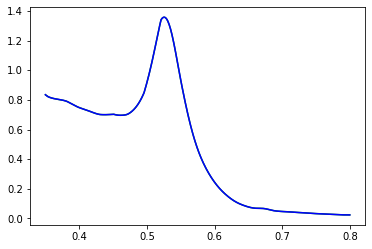

In [106]:
plt.plot(all_q['1']['0']['wave'], all_q['1']['0'][q], 'g')
plt.plot(wl, preds, 'b')

In [107]:
all_q['24']['1'].loc[all_q['24']['1'][q].isnull(), q] 

Series([], Name: Q_ext, dtype: float64)

In [108]:
preds[all_q['24']['1'][q].isnull()]

array([], dtype=float64)

In [109]:
for n in all_q:
    for spacing in all_q[n]:
        
        df = all_q[n][spacing]
        df_copy = df.dropna()
        spl = UnivariateSpline(np.array(df_copy['wave']), np.array(df_copy[q]))
        wl = np.arange(0.350, 0.800, 0.0005)
        spl.set_smoothing_factor(0.000001)
        preds = spl(wl) 
        
        all_q[n][spacing] = pd.DataFrame({'wave': wl, q: preds})

In [110]:
all_q['1']['0'][350:370]

,wave,Q_ext
350,0.5250,1.357318
351,0.5255,1.357592
352,0.5260,1.357415
353,0.5265,1.356777
354,0.5270,1.355678
355,0.5275,1.354121
356,0.5280,1.352107
357,0.5285,1.349641
358,0.5290,1.346723
359,0.5295,1.343357


In [111]:
df_list = {}
for n in all_q:
    n_list = []
    for spacing in all_q[n]:
        
        cp = all_q[n][spacing].copy()
        cp['spacing'] = float(spacing)
        n_list.append(cp)
    
    df = pd.concat(n_list, axis=0)
    df_list[n] = df


In [112]:
formatted_df = {}

for n in df_list:
    df = df_list[n]
    new_df = pd.DataFrame()
    for space in [1.0, 2.0, 3.0, 4.0]:
        ser = df.loc[df['spacing'] == space, q]
        if not ser.empty:
            new_df[str(space)] = ser
        
    formatted_df[n] = new_df

In [113]:
df_list['1'].head()
df = df_list['1']

for a in np.arange(0.8, 4.05, 0.05):
    df['%.2f' % a] = df[q]

df.drop(['spacing', q], axis=1,).to_csv(f'yz_1_new_interp_{q}.csv')


In [114]:
df = df_list['5']
new_df = pd.DataFrame()
for space in [1.0, 2.0, 3.0, 4.0]:
    ser = df.loc[df['spacing'] == space, q]
    if not ser.empty:
        new_df[str(space)] = ser
        

In [115]:
from scipy import interpolate
x = {}

for n in range(2,36):
    df = formatted_df[str(n)]
    
    y = []
    print(n)
    for i in range(0, 901):
        columns = np.array(df.columns).astype(np.float)
        vals = np.array(df.loc[i])
        f = interpolate.interp1d(columns, vals, kind='quadratic', fill_value='extrapolate')
        df_out = f(np.arange(0.8, 4.05, 0.05))
        y.append(df_out)
        
    y = np.array(y)
    x[n] = y

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [116]:
def mapper(inp):
    return '%.2f' % (0.8 + 0.05 * float(inp))

final = {}

for n in x:
    d = pd.DataFrame(x[n])
    d = d.rename(columns=mapper)
    print(d.shape)
    wl_df = pd.DataFrame({'wl' : np.arange(.350, .800, .0005)})
    print(wl_df.shape)
    out = wl_df.join(d)
    print(out)
    out.to_csv(f'yz_{n}_new_interp_{q}.csv')

(901, 65)
(901, 1)
         wl      0.80      0.85      0.90      0.95      1.00      1.05  \
0    0.3500  1.128706  1.128668  1.128621  1.128565  1.128502  1.128430   
1    0.3505  1.126387  1.126344  1.126293  1.126234  1.126167  1.126091   
2    0.3510  1.124218  1.124172  1.124117  1.124054  1.123984  1.123905   
3    0.3515  1.122118  1.122069  1.122011  1.121945  1.121872  1.121790   
4    0.3520  1.120006  1.119954  1.119894  1.119827  1.119751  1.119667   
..      ...       ...       ...       ...       ...       ...       ...   
896  0.7980  0.081538  0.080149  0.078788  0.077455  0.076150  0.074873   
897  0.7985  0.081566  0.080165  0.078793  0.077450  0.076135  0.074849   
898  0.7990  0.081589  0.080177  0.078795  0.077441  0.076116  0.074821   
899  0.7995  0.081607  0.080185  0.078791  0.077428  0.076093  0.074788   
900  0.8000  0.081620  0.080186  0.078782  0.077409  0.076065  0.074751   

         1.10      1.15      1.20  ...      3.55      3.60      3.65  \
0    1.1

(901, 65)
(901, 1)
         wl      0.80      0.85      0.90      0.95      1.00      1.05  \
0    0.3500  1.746045  1.748264  1.750430  1.752543  1.754602  1.756608   
1    0.3505  1.743298  1.745497  1.747643  1.749736  1.751776  1.753763   
2    0.3510  1.740657  1.742843  1.744976  1.747057  1.749084  1.751059   
3    0.3515  1.738073  1.740250  1.742374  1.744445  1.746464  1.748430   
4    0.3520  1.735494  1.737662  1.739777  1.741839  1.743849  1.745806   
..      ...       ...       ...       ...       ...       ...       ...   
896  0.7980  0.539683  0.522746  0.506192  0.490020  0.474230  0.458822   
897  0.7985  0.539784  0.522782  0.506164  0.489932  0.474085  0.458622   
898  0.7990  0.539826  0.522762  0.506085  0.489795  0.473894  0.458379   
899  0.7995  0.539795  0.522673  0.505940  0.489598  0.473646  0.458083   
900  0.8000  0.539676  0.522501  0.505719  0.489328  0.473329  0.457722   

         1.10      1.15      1.20  ...      3.55      3.60      3.65  \
0    1.7

(901, 65)
(901, 1)
         wl      0.80      0.85      0.90      0.95      1.00      1.05  \
0    0.3500  2.070336  2.073556  2.076707  2.079788  2.082800  2.085743   
1    0.3505  2.067102  2.070315  2.073459  2.076534  2.079539  2.082474   
2    0.3510  2.063902  2.067105  2.070239  2.073303  2.076298  2.079223   
3    0.3515  2.060770  2.063959  2.067079  2.070129  2.073111  2.076023   
4    0.3520  2.057736  2.060909  2.064012  2.067046  2.070011  2.072908   
..      ...       ...       ...       ...       ...       ...       ...   
896  0.7980  0.872077  0.843295  0.815171  0.787702  0.760890  0.734734   
897  0.7985  0.871889  0.843023  0.814818  0.787272  0.760386  0.734160   
898  0.7990  0.871632  0.842686  0.814404  0.786785  0.759830  0.733537   
899  0.7995  0.871282  0.842263  0.813910  0.786223  0.759203  0.732850   
900  0.8000  0.870818  0.841731  0.813314  0.785567  0.758489  0.732080   

         1.10      1.15      1.20  ...      3.55      3.60      3.65  \
0    2.0

[901 rows x 66 columns]
(901, 65)
(901, 1)
         wl      0.80      0.85      0.90      0.95      1.00      1.05  \
0    0.3500  2.321446  2.325256  2.328985  2.332634  2.336202  2.339689   
1    0.3505  2.317876  2.321672  2.325387  2.329022  2.332576  2.336049   
2    0.3510  2.314457  2.318235  2.321931  2.325547  2.329083  2.332538   
3    0.3515  2.311110  2.314869  2.318547  2.322146  2.325664  2.329101   
4    0.3520  2.307753  2.311500  2.315166  2.318752  2.322258  2.325684   
..      ...       ...       ...       ...       ...       ...       ...   
896  0.7980  1.105406  1.068451  1.032338  0.997069  0.962642  0.929058   
897  0.7985  1.104977  1.067925  1.031720  0.996362  0.961852  0.928188   
898  0.7990  1.104497  1.067351  1.031057  0.995614  0.961022  0.927282   
899  0.7995  1.103941  1.066707  1.030327  0.994803  0.960134  0.926320   
900  0.8000  1.103286  1.065967  1.029508  0.993908  0.959167  0.925286   

         1.10      1.15      1.20  ...      3.55      3.

         wl      0.80      0.85      0.90      0.95      1.00      1.05  \
0    0.3500  2.460149  2.464402  2.468562  2.472628  2.476601  2.480480   
1    0.3505  2.456373  2.460615  2.464763  2.468817  2.472777  2.476644   
2    0.3510  2.452801  2.457013  2.461132  2.465158  2.469091  2.472931   
3    0.3515  2.449328  2.453508  2.457595  2.461591  2.465494  2.469304   
4    0.3520  2.445849  2.450008  2.454076  2.458052  2.461936  2.465728   
..      ...       ...       ...       ...       ...       ...       ...   
896  0.7980  1.230511  1.187921  1.146377  1.105879  1.066427  1.028021   
897  0.7985  1.230008  1.187302  1.145648  1.105045  1.065493  1.026993   
898  0.7990  1.229456  1.186637  1.144875  1.104170  1.064522  1.025931   
899  0.7995  1.228826  1.185899  1.144034  1.103232  1.063492  1.024815   
900  0.8000  1.228092  1.185063  1.143102  1.102208  1.062382  1.023623   

         1.10      1.15      1.20  ...      3.55      3.60      3.65  \
0    2.484265  2.487957  2.

(901, 65)
(901, 1)
         wl      0.80      0.85      0.90      0.95      1.00      1.05  \
0    0.3500  2.645471  2.650158  2.654742  2.659223  2.663601  2.667877   
1    0.3505  2.641444  2.646110  2.650674  2.655135  2.659493  2.663749   
2    0.3510  2.637526  2.642171  2.646713  2.651153  2.655492  2.659728   
3    0.3515  2.633688  2.638313  2.642836  2.647258  2.651577  2.655794   
4    0.3520  2.629903  2.634512  2.639020  2.643425  2.647729  2.651931   
..      ...       ...       ...       ...       ...       ...       ...   
896  0.7980  1.376843  1.329012  1.282355  1.236873  1.192565  1.149431   
897  0.7985  1.376213  1.328257  1.281482  1.235887  1.191472  1.148238   
898  0.7990  1.375534  1.327456  1.280566  1.234861  1.190344  1.147012   
899  0.7995  1.374774  1.326581  1.279580  1.233771  1.189155  1.145731   
900  0.8000  1.373903  1.325601  1.278498  1.232591  1.187883  1.144372   

         1.10      1.15      1.20  ...      3.55      3.60      3.65  \
0    2.6

In [86]:
out

,wl,0.80,0.85,0.90,0.95,1.00,1.05,1.10,1.15,1.20,...,3.55,3.60,3.65,3.70,3.75,3.80,3.85,3.90,3.95,4.00
0,0.3500,2.168763,2.172453,2.176123,2.179773,2.183404,2.187015,2.190607,2.194179,2.197731,...,2.342741,2.345368,2.347976,2.350565,2.353135,2.355686,2.358218,2.360731,2.363225,2.365701
1,0.3505,2.163653,2.167326,2.170979,2.174614,2.178229,2.181826,2.185404,2.188963,2.192503,...,2.337473,2.340094,2.342695,2.345277,2.347839,2.350382,2.352906,2.355410,2.357894,2.360359
2,0.3510,2.158820,2.162484,2.166130,2.169756,2.173364,2.176953,2.180523,2.184074,2.187607,...,2.332249,2.334865,2.337462,2.340039,2.342596,2.345135,2.347653,2.350153,2.352633,2.355094
3,0.3515,2.154117,2.157778,2.161420,2.165042,2.168646,2.172230,2.175795,2.179341,2.182868,...,2.327080,2.329693,2.332286,2.334861,2.337417,2.339954,2.342472,2.344971,2.347451,2.349912
4,0.3520,2.149401,2.153057,2.156695,2.160312,2.163911,2.167490,2.171050,2.174591,2.178112,...,2.321975,2.324587,2.327180,2.329755,2.332312,2.334851,2.337370,2.339872,2.342355,2.344820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,0.7980,0.053665,0.053754,0.053843,0.053932,0.054021,0.054109,0.054198,0.054286,0.054374,...,0.058316,0.058397,0.058478,0.058559,0.058640,0.058721,0.058802,0.058883,0.058963,0.059044
897,0.7985,0.053683,0.053772,0.053861,0.053949,0.054038,0.054126,0.054214,0.054302,0.054389,...,0.058320,0.058401,0.058482,0.058562,0.058643,0.058723,0.058804,0.058884,0.058964,0.059044
898,0.7990,0.053699,0.053788,0.053876,0.053964,0.054052,0.054139,0.054227,0.054314,0.054402,...,0.058322,0.058402,0.058482,0.058563,0.058643,0.058722,0.058802,0.058882,0.058961,0.059041
899,0.7995,0.053712,0.053800,0.053887,0.053975,0.054062,0.054149,0.054236,0.054323,0.054410,...,0.058321,0.058400,0.058480,0.058559,0.058639,0.058718,0.058797,0.058876,0.058954,0.059033


In [18]:
from scipy.interpolate import BivariateSpline
from scipy import interpolate


ones = df_list[0][df_list[0]['spacing'] == 1.0].dropna()
twos = df_list[0][df_list[0]['spacing'] == 2.0]
threes = df_list[0][df_list[0]['spacing'] == 3.0]
fours = df_list[0][df_list[0]['spacing'] == 4.0]


# spl = BivariateSpline(ones['wave'], ones['spacing'], ones['Q_abs'], s=0.000001)


# tck = interpolate.bisplrep(ones['wave'], ones['spacing'], ones['Q_abs'], s=0.1)
# znew = interpolate.bisplev(ones['wave'], ones['spacing'], tck)

# wl = np.arange(0.350, 0.800, 0.001)

# preds = spl(ones['wave'], ones['spacing']) 
plt.plot(ones['wave'], ones['Q_abs'])
plt.plot(twos['wave'], twos['Q_abs'])
plt.plot(threes['wave'], threes['Q_abs'])
plt.plot(fours['wave'], fours['Q_abs'])


# plt.plot(ones['wave'], znew)

KeyError: 0